In [1]:
import pandas as pd
import numpy as np
from datetime import date, datetime
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
# Data from https://data.mendeley.com/datasets/5cxyb5fp4f/1

C:\Users\18224\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
pd.set_option('display.max_columns', 30)

In [3]:
data = pd.read_csv("Motor vehicle insurance data.csv",dtype=
                   {"ID": int, "Date_start_contract": "string", "Date_last_renewal":"string",
                    "Date_next_renewal":"string","Date_birth":'string',"Date_driving_licence":"string",
                    "Distribution_channel":'string', "Seniority":int, "Policies_in_force":int, "Max_policies":int, "Max_products":int,"Lapse":int,
                    "Date_lapse":"string","Payment":int,"Premium":float,"Cost_claims_year":float,"N_claims_year":int,
                    "N_claims_history":int, "R_Claims_history":float,"Type_risk":int,"Area":int,"Second_driver":int,"Year_matriculation":int,
                    "Power":int,"Cylinder_capacity":int,"Value_vehicle":float,"N_doors":int,"Type_fuel":"string",
                    "Length":float,"Weight":int
                   },header='infer')
data.dtypes

ID                        int32
Date_start_contract      string
Date_last_renewal        string
Date_next_renewal        string
Date_birth               string
Date_driving_licence     string
Distribution_channel     string
Seniority                 int32
Policies_in_force         int32
Max_policies              int32
Max_products              int32
Lapse                     int32
Date_lapse               string
Payment                   int32
Premium                 float64
Cost_claims_year        float64
N_claims_year             int32
N_claims_history          int32
R_Claims_history        float64
Type_risk                 int32
Area                      int32
Second_driver             int32
Year_matriculation        int32
Power                     int32
Cylinder_capacity         int32
Value_vehicle           float64
N_doors                   int32
Type_fuel                string
Length                  float64
Weight                    int32
dtype: object

In [6]:
numeric_features = ['Seniority','Policies_in_force','Max_policies','Max_products',
                   'Lapse','Payment','Premium','N_claims_year','N_claims_history',
                   'R_Claims_history','Power','Cylinder_capacity','Value_vehicle','N_doors',
                   'Length','Weight']
categorical_features = ['ID','Date_start_contract','Date_last_renewal','Date_next_renewal','Date_birth',
                        'Date_driving_licence','Type_risk','Area','Second_driver','Year_matriculation',
                       'Type_fuel','Date_lapse']
target = 'Cost_claims_year'

### Data cleaning and formatting


C:\Users\18224\AppData\Local\Temp\ipykernel_19968\1061444992.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


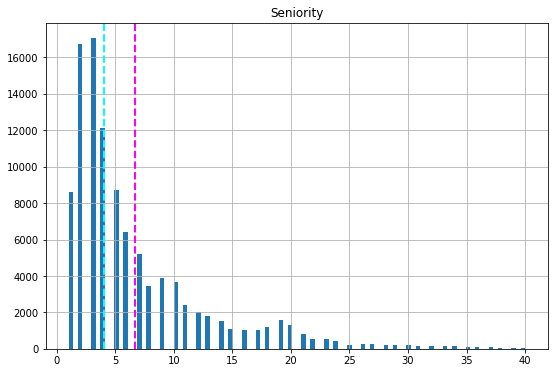

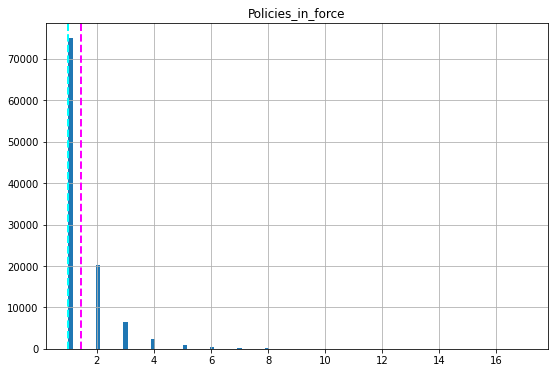

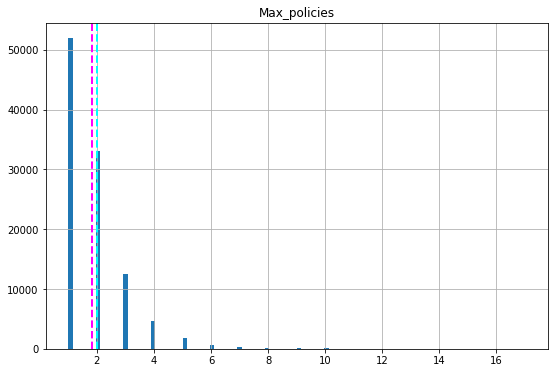

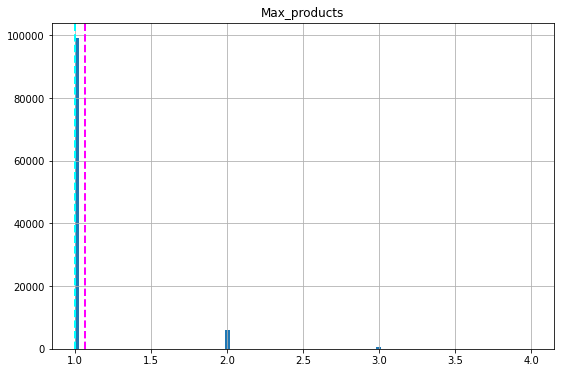

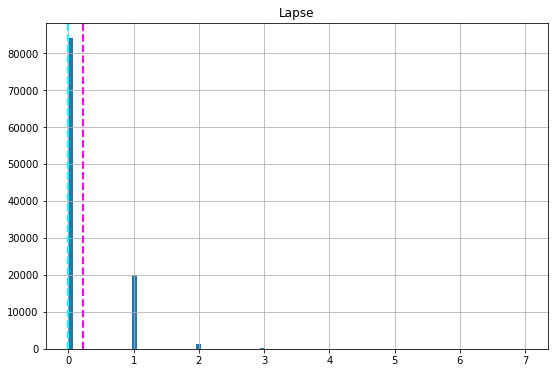

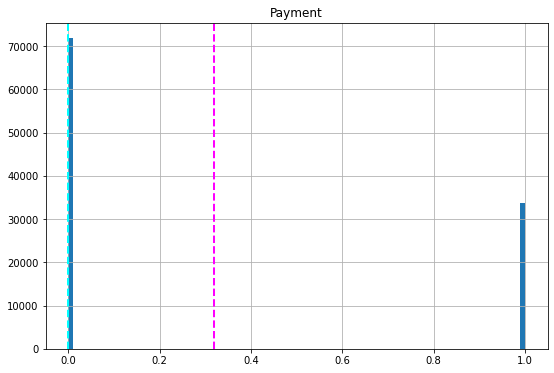

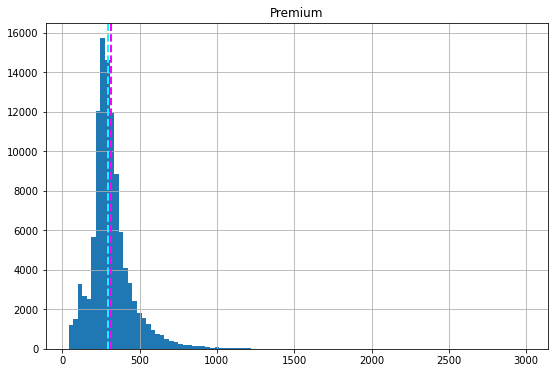

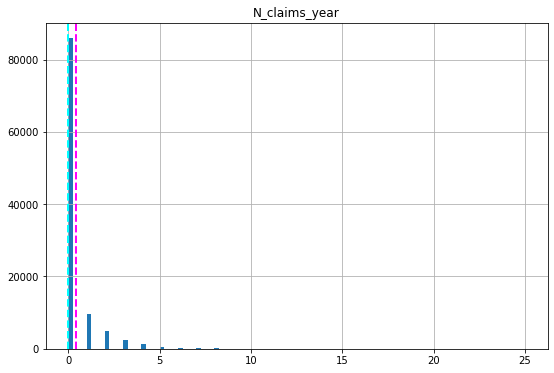

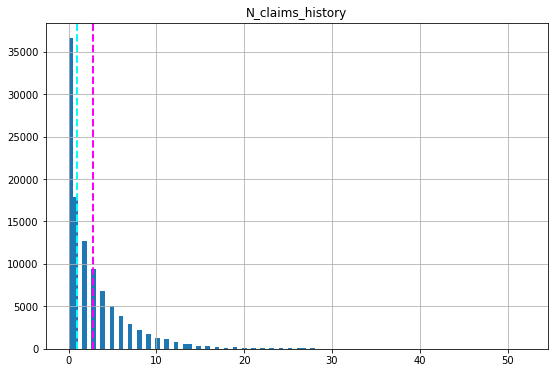

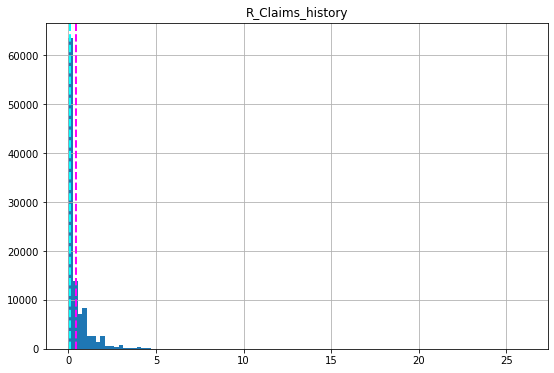

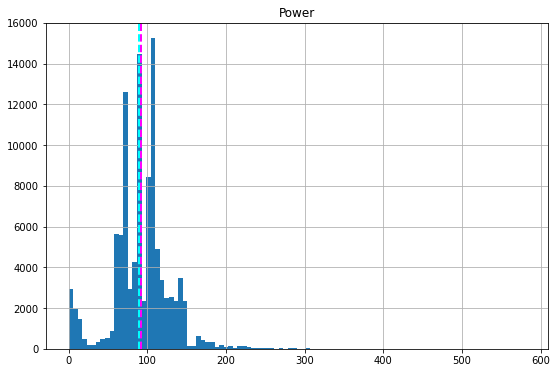

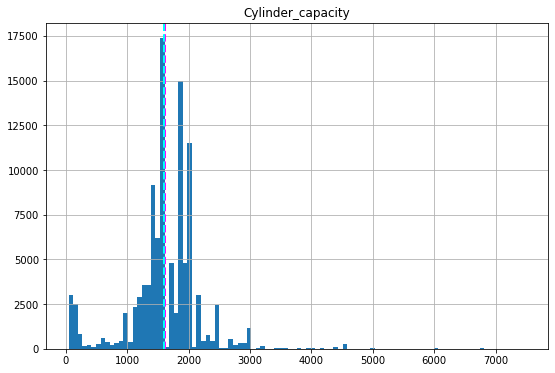

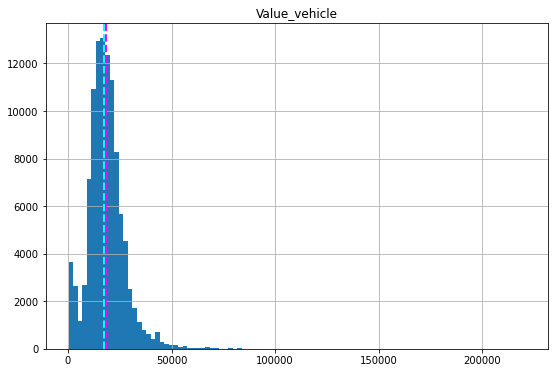

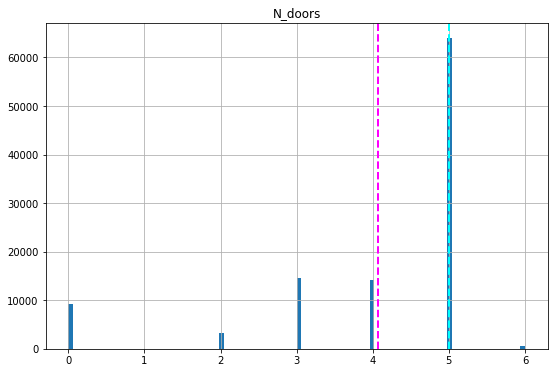

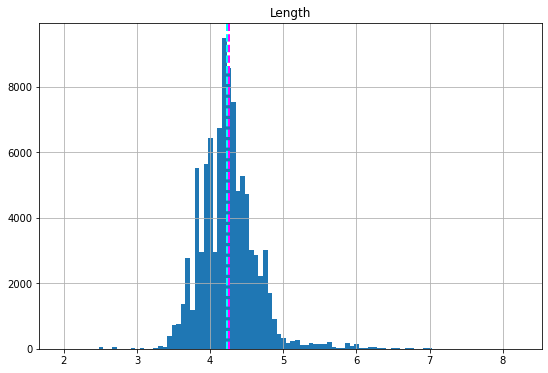

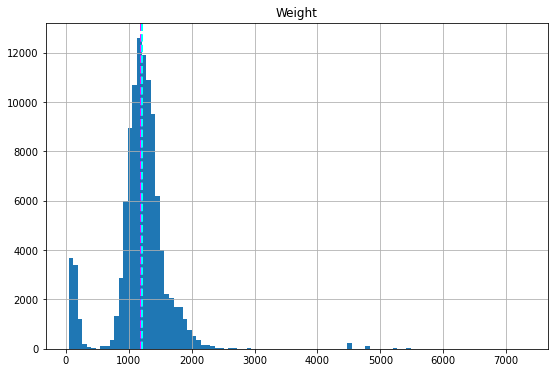

In [7]:
"""0.plot to see the data"""

for col in numeric_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=100,ax = ax)
    ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(),color='cyan',linestyle='dashed', linewidth=2)
    ax.set_title(col)
fig.show()

In [ ]:
"""1. found mis-input in distribution_channel"""
data['Distribution_channel'].unique()

In [ ]:
rslt_df = data.loc[data['Distribution_channel'] == '00/01/1900']
print(rslt_df)

In [ ]:
"""2.null/nan"""
pd.isnull(data)

In [ ]:
"""3.find the age of driver"""
today = date.today()
str_d1 = today.strftime("%d/%m/%Y")
d1 = datetime.strptime(str_d1, "%d/%m/%Y").year

data['Date_birth'] = pd.to_datetime(data['Date_birth'], errors='coerce', infer_datetime_format=True,utc=True)
data['year_birth'] = data['Date_birth'].dt.year
data['age'] = d1-data['year_birth']

In [ ]:
 """knn impute"""
data['new Distribution_channel'] = data['Distribution_channel'].map({1: 1, 0: 0,'00/01/1900':'Nan'})

imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(data)

### data engineering and feature selection 

In [ ]:
features = ['Value_vehicle','Policies_in_force','Cost_claims_year','N_claims_year','Type_risk','Area']
target = ''